In [2]:
import matplotlib.pyplot as plt
from models import CnnModel, CrnnLongModel, CrnnModel, RnnModel
from train import main_train, validate_test, record_matrix
from Paras_nb import Para
from data_loader import torch_dataset_loader
import torch

# CNN model
## Define Paras

In [2]:
Para.learning_rate = 1e-5
Para.batch_size = 32
Para.epoch_num = 40

train_loader = torch_dataset_loader(Para.TEST_TRAIN_DATA_PATH, Para.batch_size, True, Para.kwargs)
validation_loader = torch_dataset_loader(Para.TEST_VAL_DATA_PATH, Para.batch_size, False, Para.kwargs)
test_loader = torch_dataset_loader(Para.TEST_TEST_DATA_PATH, Para.batch_size, False, Para.kwargs)

In [3]:
CNN = CnnModel()
log_name = 'CnnModel_guitar_JohnAll_128.json'
save_name = 'CnnModel_guitar_JohnAll_128.pt'

## Train Model

In [ ]:
res = main_train(model=CNN, 
                 train_loader=train_loader,
                 valid_loader=validation_loader,
                 log_name=log_name,
                 save_name=save_name,
                 lr=Para.learning_rate,
                 epoch_num=Para.epoch_num)

In [9]:
res['train_accu'][-1] # 93.1% Training Accuracy
# res['valid_accu'][-1] # 87.5% Validation Accuracy


0.9311625874125874

In [ ]:
plt.figure()
plt.plot(res['train_loss'], c='b', label='Training set loss')
plt.plot(res['valid_loss'], c='r', label='Validation set loss')
plt.title('Loss vs Epochs / CNN Model')
plt.legend()
plt.show()
plt.savefig('Loss_v_epoch_JohnAll.png')

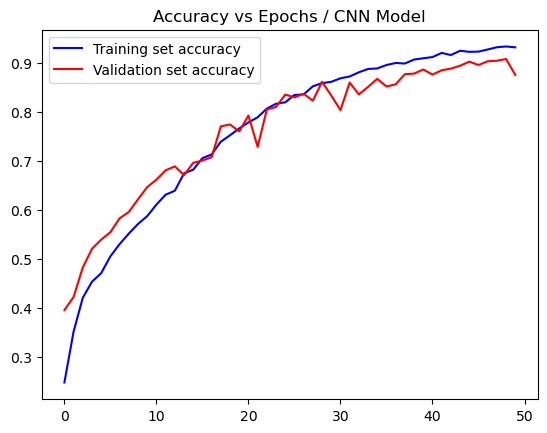

In [11]:
plt.figure()
plt.plot(res['train_accu'], c='b', label='Training set accuracy')
plt.plot(res['valid_accu'], c='r', label='Validation set accuracy')
plt.title('Accuracy vs Epochs / CNN Model')
plt.legend()
plt.show()
plt.savefig('Acc_v_epoch_JohnAll.png')

## Test Model

In [5]:
CNN.load_state_dict(torch.load(Para.MODEL_SAVE_FOlD + 'CnnModel_guitar_JohnAll_128.pt'))
validate_test(model=CNN, epoch=40, use_loader=test_loader)

End of validation epoch  40 | time:  8.04s | BCE: 0.0732 | Accuracy: 88.45% |
---------------------------------------------------------------------------------------------------


(0.07318112129966418, 0.8844572368421053)

In [6]:
CNN.load_state_dict(torch.load(Para.MODEL_SAVE_FOlD + 'CnnModel_guitar_JohnAll_128.pt'))
record_matrix(model=CNN, use_loader=test_loader, log_name='CnnMatrix_guitar_JohnAll_128.json')

End of Matrix Record, Save file in ../log/CnnMatrix_guitar_JohnAll_128.json
---------------------------------------------------------------------------------------------------


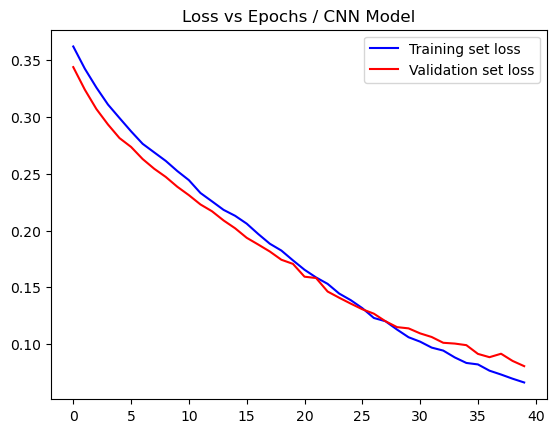

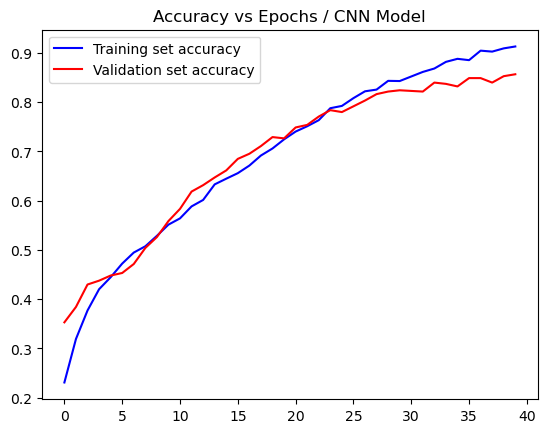

In [7]:
import json
f = open(Para.LOG_SAVE_FOLD + 'CnnModel_guitar_JohnAll_128.json')
res_load = json.load(f)
res_load["train_loss"]


plt.figure()
plt.plot(res_load['train_loss'], c='b', label='Training set loss')
plt.plot(res_load['valid_loss'], c='r', label='Validation set loss')
plt.title('Loss vs Epochs / CNN Model')
plt.legend()
plt.savefig('Loss_v_epoch_JohnAll.png')
plt.show()



plt.figure()
plt.plot(res_load['train_accu'], c='b', label='Training set accuracy')
plt.plot(res_load['valid_accu'], c='r', label='Validation set accuracy')
plt.title('Accuracy vs Epochs / CNN Model')
plt.legend()
plt.savefig('Acc_v_epoch_JohnAll.png')
plt.show()


In [8]:
print(res_load["train_loss"][-1],
res_load["valid_loss"][-1],
res_load["valid_accu"][-1],
res_load["train_accu"][-1])

0.06615019104454989 0.08053554842869441 0.8567708333333334 0.9131944444444444


# CRNN Model - Only if needed
## Paras

In [13]:
Para.learning_rate = 1e-5
Para.batch_size = 20
Para.epoch_num = 60

In [14]:
CRNN = CrnnModel()

## Train

In [ ]:
res = main_train(model=CRNN, 
                 train_loader=train_loader,
                 valid_loader=validation_loader,
                 log_name='CrnnModel_JohnAll.json',
                 save_name='CrnnModel_JohnAll.pt',
                 lr=Para.learning_rate,
                 epoch_num=Para.epoch_num)

In [ ]:
res

## Test Model

In [ ]:
plt.figure()
plt.plot(res['train_accu'], c='b', label='Training set accuracy')
plt.plot(res['valid_accu'], c='r', label='Validation set accuracy')
plt.title('Accuracy vs Epochs / CRNN Model')
plt.legend()
plt.show()

In [17]:
CRNN.cuda().load_state_dict(torch.load(Para.MODEL_SAVE_FOlD + 'CrnnModel.pt'))
validate_test(model=CRNN, epoch=0, use_loader=test_loader)

End of validation epoch   0 | time:  0.56s | BCE: 0.0961 | Accuracy: 83.05% |
---------------------------------------------------------------------------------------------------


(0.09608108296449627, 0.8305028462998102)

In [8]:
CRNN.cuda().load_state_dict(torch.load(Para.MODEL_SAVE_FOlD + 'CrnnModel.pt'))
record_matrix(model=CRNN, use_loader=test_loader, log_name='CrnnMatrix.json')

End of Matrix Record, Save file in ../log/CrnnMatrix.json
---------------------------------------------------------------------------------------------------


# LCRNN Model
## Paras

In [9]:
Para.learning_rate = 1e-5
Para.batch_size = 20
Para.epoch_num = 60

train_loader = torch_dataset_loader(Para.LA_TRAIN_DATA_PATH, Para.batch_size, True, Para.kwargs)
validation_loader = torch_dataset_loader(Para.LA_VAL_DATA_PATH, Para.batch_size, False, Para.kwargs)
test_loader = torch_dataset_loader(Para.LA_TEST_DATA_PATH, Para.batch_size, False, Para.kwargs)

LCRNN = CrnnLongModel()

## Train

In [3]:
res = main_train(model=LCRNN, 
                 train_loader=train_loader,
                 valid_loader=validation_loader,
                 log_name='CrnnLongModel.json',
                 save_name='CrnnLongModel.pt',
                 lr=Para.learning_rate,
                 epoch_num=Para.epoch_num)

Epoch  1 |  56/227 batches | 76.85ms/ batch | BCE: 0.3214 | Accuracy: 14.55% |
Epoch  1 | 112/227 batches | 75.96ms/ batch | BCE: 0.3177 | Accuracy: 18.12% |
Epoch  1 | 168/227 batches | 75.67ms/ batch | BCE: 0.3157 | Accuracy: 20.09% |
Epoch  1 | 224/227 batches | 75.52ms/ batch | BCE: 0.3134 | Accuracy: 22.28% |
---------------------------------------------------------------------------------------------------
End of training epoch   1 | time: 17.14s | BCE: 0.3133 | Accuracy: 22.34% |
End of validation epoch   1 | time:  0.71s | BCE: 0.3007 | Accuracy: 33.28% |
---------------------------------------------------------------------------------------------------
***Found Best Training Model***
***Best Validation Model Found and Saved***
---------------------------------------------------------------------------------------------------
Epoch  2 |  56/227 batches | 76.44ms/ batch | BCE: 0.3039 | Accuracy: 27.95% |
Epoch  2 | 112/227 batches | 75.84ms/ batch | BCE: 0.3018 | Accuracy: 28.71

Epoch 11 |  56/227 batches | 76.17ms/ batch | BCE: 0.1966 | Accuracy: 57.32% |
Epoch 11 | 112/227 batches | 75.74ms/ batch | BCE: 0.1954 | Accuracy: 57.46% |
Epoch 11 | 168/227 batches | 75.48ms/ batch | BCE: 0.1941 | Accuracy: 58.72% |
Epoch 11 | 224/227 batches | 75.43ms/ batch | BCE: 0.1924 | Accuracy: 58.91% |
---------------------------------------------------------------------------------------------------
End of training epoch  11 | time: 17.13s | BCE: 0.1922 | Accuracy: 59.02% |
End of validation epoch  11 | time:  0.70s | BCE: 0.1749 | Accuracy: 65.69% |
---------------------------------------------------------------------------------------------------
***Found Best Training Model***
***Best Validation Model Found and Saved***
---------------------------------------------------------------------------------------------------
Epoch 12 |  56/227 batches | 76.62ms/ batch | BCE: 0.1861 | Accuracy: 61.34% |
Epoch 12 | 112/227 batches | 75.92ms/ batch | BCE: 0.1856 | Accuracy: 61.03

Epoch 21 |  56/227 batches | 76.70ms/ batch | BCE: 0.1198 | Accuracy: 78.39% |
Epoch 21 | 112/227 batches | 76.08ms/ batch | BCE: 0.1180 | Accuracy: 78.53% |
Epoch 21 | 168/227 batches | 75.81ms/ batch | BCE: 0.1166 | Accuracy: 78.36% |
Epoch 21 | 224/227 batches | 75.69ms/ batch | BCE: 0.1164 | Accuracy: 78.24% |
---------------------------------------------------------------------------------------------------
End of training epoch  21 | time: 17.18s | BCE: 0.1164 | Accuracy: 78.32% |
End of validation epoch  21 | time:  0.71s | BCE: 0.1155 | Accuracy: 75.92% |
---------------------------------------------------------------------------------------------------
***Found Best Training Model***
---------------------------------------------------------------------------------------------------
Epoch 22 |  56/227 batches | 76.53ms/ batch | BCE: 0.1142 | Accuracy: 78.30% |
Epoch 22 | 112/227 batches | 75.87ms/ batch | BCE: 0.1121 | Accuracy: 78.84% |
Epoch 22 | 168/227 batches | 75.65ms/ ba

Epoch 31 |  56/227 batches | 76.56ms/ batch | BCE: 0.0649 | Accuracy: 89.20% |
Epoch 31 | 112/227 batches | 75.91ms/ batch | BCE: 0.0649 | Accuracy: 89.29% |
Epoch 31 | 168/227 batches | 75.67ms/ batch | BCE: 0.0660 | Accuracy: 88.90% |
Epoch 31 | 224/227 batches | 75.59ms/ batch | BCE: 0.0643 | Accuracy: 89.37% |
---------------------------------------------------------------------------------------------------
End of training epoch  31 | time: 17.16s | BCE: 0.0647 | Accuracy: 89.22% |
End of validation epoch  31 | time:  0.70s | BCE: 0.0920 | Accuracy: 82.93% |
---------------------------------------------------------------------------------------------------
***Found Best Training Model***
---------------------------------------------------------------------------------------------------
Epoch 32 |  56/227 batches | 76.36ms/ batch | BCE: 0.0578 | Accuracy: 91.07% |
Epoch 32 | 112/227 batches | 75.78ms/ batch | BCE: 0.0587 | Accuracy: 90.71% |
Epoch 32 | 168/227 batches | 75.65ms/ ba

Epoch 41 |  56/227 batches | 75.94ms/ batch | BCE: 0.0308 | Accuracy: 95.45% |
Epoch 41 | 112/227 batches | 75.44ms/ batch | BCE: 0.0320 | Accuracy: 95.09% |
Epoch 41 | 168/227 batches | 75.29ms/ batch | BCE: 0.0310 | Accuracy: 95.48% |
Epoch 41 | 224/227 batches | 75.28ms/ batch | BCE: 0.0313 | Accuracy: 95.33% |
---------------------------------------------------------------------------------------------------
End of training epoch  41 | time: 17.09s | BCE: 0.0314 | Accuracy: 95.36% |
End of validation epoch  41 | time:  0.71s | BCE: 0.0719 | Accuracy: 88.10% |
---------------------------------------------------------------------------------------------------
***Found Best Training Model***
***Best Validation Model Found and Saved***
---------------------------------------------------------------------------------------------------
Epoch 42 |  56/227 batches | 76.34ms/ batch | BCE: 0.0258 | Accuracy: 97.14% |
Epoch 42 | 112/227 batches | 75.82ms/ batch | BCE: 0.0302 | Accuracy: 95.67

Epoch 51 | 224/227 batches | 75.48ms/ batch | BCE: 0.0148 | Accuracy: 97.99% |
---------------------------------------------------------------------------------------------------
End of training epoch  51 | time: 17.14s | BCE: 0.0149 | Accuracy: 97.97% |
End of validation epoch  51 | time:  0.70s | BCE: 0.0748 | Accuracy: 87.41% |
---------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------
Epoch 52 |  56/227 batches | 76.39ms/ batch | BCE: 0.0168 | Accuracy: 97.23% |
Epoch 52 | 112/227 batches | 75.78ms/ batch | BCE: 0.0155 | Accuracy: 97.77% |
Epoch 52 | 168/227 batches | 75.62ms/ batch | BCE: 0.0152 | Accuracy: 98.01% |
Epoch 52 | 224/227 batches | 75.55ms/ batch | BCE: 0.0153 | Accuracy: 98.04% |
---------------------------------------------------------------------------------------------------
End of training epoch  52 | time: 17.15s | BCE: 0.0

## Test Model

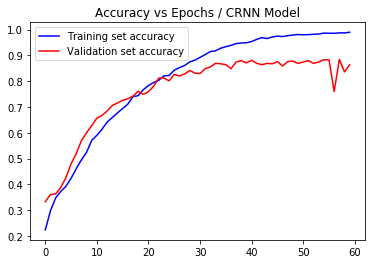

In [4]:
plt.figure()
plt.plot(res['train_accu'], c='b', label='Training set accuracy')
plt.plot(res['valid_accu'], c='r', label='Validation set accuracy')
plt.title('Accuracy vs Epochs / CRNN Model')
plt.legend()
plt.show()

In [6]:
LCRNN.cuda().load_state_dict(torch.load(Para.MODEL_SAVE_FOlD + 'CrnnLongModel.pt'))
validate_test(model=LCRNN, epoch=0, use_loader=test_loader)

End of validation epoch   0 | time:  0.71s | BCE: 0.0955 | Accuracy: 82.67% |
---------------------------------------------------------------------------------------------------


(0.09551812168853037, 0.8267241379310345)

In [10]:
LCRNN.cuda().load_state_dict(torch.load(Para.MODEL_SAVE_FOlD + 'CrnnLongModel.pt'))
record_matrix(model=LCRNN, use_loader=test_loader, log_name='CrnnLongMatrix.json')

End of Matrix Record, Save file in ../log/CrnnLongMatrix.json
---------------------------------------------------------------------------------------------------


# RNN Model

In [2]:
Para.learning_rate = 1e-5
Para.batch_size = 32
Para.epoch_num = 40

train_loader = torch_dataset_loader(Para.LA_TRAIN_DATA_PATH, Para.batch_size, True, Para.kwargs)
validation_loader = torch_dataset_loader(Para.LA_VAL_DATA_PATH, Para.batch_size, False, Para.kwargs)
test_loader = torch_dataset_loader(Para.LA_TEST_DATA_PATH, Para.batch_size, False, Para.kwargs)

RNN = RnnModel()

In [3]:
res = main_train(model=RNN, 
                 train_loader=train_loader,
                 valid_loader=validation_loader,
                 log_name='RnnModel.json',
                 save_name='RnnModel.pt',
                 lr=Para.learning_rate,
                 epoch_num=Para.epoch_num)

Epoch  1 |  35/142 batches | 345.74ms/ batch | BCE: 0.3253 | Accuracy: 12.32% |
Epoch  1 |  70/142 batches | 344.24ms/ batch | BCE: 0.3249 | Accuracy: 12.50% |
Epoch  1 | 105/142 batches | 343.67ms/ batch | BCE: 0.3247 | Accuracy: 12.71% |
Epoch  1 | 140/142 batches | 343.45ms/ batch | BCE: 0.3249 | Accuracy: 12.54% |
---------------------------------------------------------------------------------------------------
End of training epoch   1 | time: 48.71s | BCE: 0.3248 | Accuracy: 12.61% |
End of validation epoch   1 | time:  1.77s | BCE: 0.3227 | Accuracy: 17.61% |
---------------------------------------------------------------------------------------------------
***Found Best Training Model***
***Best Validation Model Found and Saved***
---------------------------------------------------------------------------------------------------
Epoch  2 |  35/142 batches | 345.86ms/ batch | BCE: 0.3247 | Accuracy: 12.86% |
Epoch  2 |  70/142 batches | 344.52ms/ batch | BCE: 0.3241 | Accuracy:

Epoch 11 |  35/142 batches | 345.10ms/ batch | BCE: 0.1894 | Accuracy: 53.66% |
Epoch 11 |  70/142 batches | 344.12ms/ batch | BCE: 0.1886 | Accuracy: 54.20% |
Epoch 11 | 105/142 batches | 343.72ms/ batch | BCE: 0.1879 | Accuracy: 54.49% |
Epoch 11 | 140/142 batches | 343.56ms/ batch | BCE: 0.1875 | Accuracy: 54.29% |
---------------------------------------------------------------------------------------------------
End of training epoch  11 | time: 48.72s | BCE: 0.1871 | Accuracy: 54.35% |
End of validation epoch  11 | time:  1.77s | BCE: 0.1598 | Accuracy: 63.78% |
---------------------------------------------------------------------------------------------------
***Found Best Training Model***
***Best Validation Model Found and Saved***
---------------------------------------------------------------------------------------------------
Epoch 12 |  35/142 batches | 346.18ms/ batch | BCE: 0.1775 | Accuracy: 56.70% |
Epoch 12 |  70/142 batches | 344.93ms/ batch | BCE: 0.1778 | Accuracy:

Epoch 21 |  35/142 batches | 345.45ms/ batch | BCE: 0.0914 | Accuracy: 80.54% |
Epoch 21 |  70/142 batches | 344.40ms/ batch | BCE: 0.0924 | Accuracy: 80.45% |
Epoch 21 | 105/142 batches | 344.05ms/ batch | BCE: 0.0946 | Accuracy: 79.73% |
Epoch 21 | 140/142 batches | 343.86ms/ batch | BCE: 0.0962 | Accuracy: 79.35% |
---------------------------------------------------------------------------------------------------
End of training epoch  21 | time: 48.76s | BCE: 0.0959 | Accuracy: 79.45% |
End of validation epoch  21 | time:  1.77s | BCE: 0.1105 | Accuracy: 76.61% |
---------------------------------------------------------------------------------------------------
***Found Best Training Model***
***Best Validation Model Found and Saved***
---------------------------------------------------------------------------------------------------
Epoch 22 |  35/142 batches | 346.48ms/ batch | BCE: 0.0842 | Accuracy: 83.04% |
Epoch 22 |  70/142 batches | 345.08ms/ batch | BCE: 0.0853 | Accuracy:

Epoch 31 |  35/142 batches | 345.26ms/ batch | BCE: 0.0298 | Accuracy: 94.91% |
Epoch 31 |  70/142 batches | 344.31ms/ batch | BCE: 0.0297 | Accuracy: 94.73% |
Epoch 31 | 105/142 batches | 344.01ms/ batch | BCE: 0.0333 | Accuracy: 94.32% |
Epoch 31 | 140/142 batches | 343.81ms/ batch | BCE: 0.0357 | Accuracy: 93.77% |
---------------------------------------------------------------------------------------------------
End of training epoch  31 | time: 48.75s | BCE: 0.0357 | Accuracy: 93.82% |
End of validation epoch  31 | time:  1.77s | BCE: 0.1111 | Accuracy: 82.61% |
---------------------------------------------------------------------------------------------------
***Best Validation Model Found and Saved***
---------------------------------------------------------------------------------------------------
Epoch 32 |  35/142 batches | 346.32ms/ batch | BCE: 0.0312 | Accuracy: 94.02% |
Epoch 32 |  70/142 batches | 345.01ms/ batch | BCE: 0.0272 | Accuracy: 94.96% |
Epoch 32 | 105/142 bat

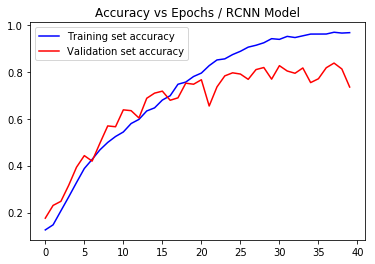

In [4]:
plt.figure()
plt.plot(res['train_accu'], c='b', label='Training set accuracy')
plt.plot(res['valid_accu'], c='r', label='Validation set accuracy')
plt.title('Accuracy vs Epochs / RCNN Model')
plt.legend()
plt.show()

In [5]:
RNN.cuda().load_state_dict(torch.load(Para.MODEL_SAVE_FOlD + 'RnnModel.pt'))
validate_test(model=RNN, epoch=0, use_loader=test_loader)

End of validation epoch   0 | time:  2.21s | BCE: 0.1221 | Accuracy: 82.64% |
---------------------------------------------------------------------------------------------------


(0.1220573919514815, 0.8263888888888888)